In [1]:
import numpy as np
import pandas as pda
import os 
import sys
sys.path.append(os.path.abspath('../common')) # add path to common functions

In [3]:
from preprocess import getdfs, process_strings

train_df, valid_df = getdfs('text_seq')

train_df['input_str'] = process_strings(train_df['input_str'])
valid_df['input_str'] = process_strings(valid_df['input_str'])

In [4]:
text_train = train_df['input_str'].values
text_valid = valid_df['input_str'].values
y_train = train_df['label'].values
y_valid = valid_df['label'].values

In [5]:
text_train

array(['271828003132000', '369511047476100', '599913580405100', ...,
       '306994309179500', '198337758940000', '476119231899000'],
      dtype=object)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(3, 5), analyzer='char')  # Extract n-grams
x_train = vectorizer.fit_transform(text_train).toarray()
x_valid = vectorizer.transform(text_valid).toarray()

# Fit and transform the data
x_train = vectorizer.fit_transform(text_train)
x_valid = vectorizer.transform(text_valid)

In [7]:
x_train

<7080x23844 sparse matrix of type '<class 'numpy.int64'>'
	with 251019 stored elements in Compressed Sparse Row format>

In [8]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions
import matplotlib.pyplot as plt

==========Random Forest==========
              precision    recall  f1-score   support

     Class 0       0.86      0.87      0.86       252
     Class 1       0.86      0.85      0.85       237

    accuracy                           0.86       489
   macro avg       0.86      0.86      0.86       489
weighted avg       0.86      0.86      0.86       489

Accuracy is 0.8568507157464212
==========Random Forest==========
==========XGBoost==========
              precision    recall  f1-score   support

     Class 0       0.91      0.92      0.91       252
     Class 1       0.91      0.90      0.90       237

    accuracy                           0.91       489
   macro avg       0.91      0.91      0.91       489
weighted avg       0.91      0.91      0.91       489

Accuracy is 0.9079754601226994
==========XGBoost==========
==========Logistic Regression==========
              precision    recall  f1-score   support

     Class 0       0.91      0.89      0.90       252
     Class 

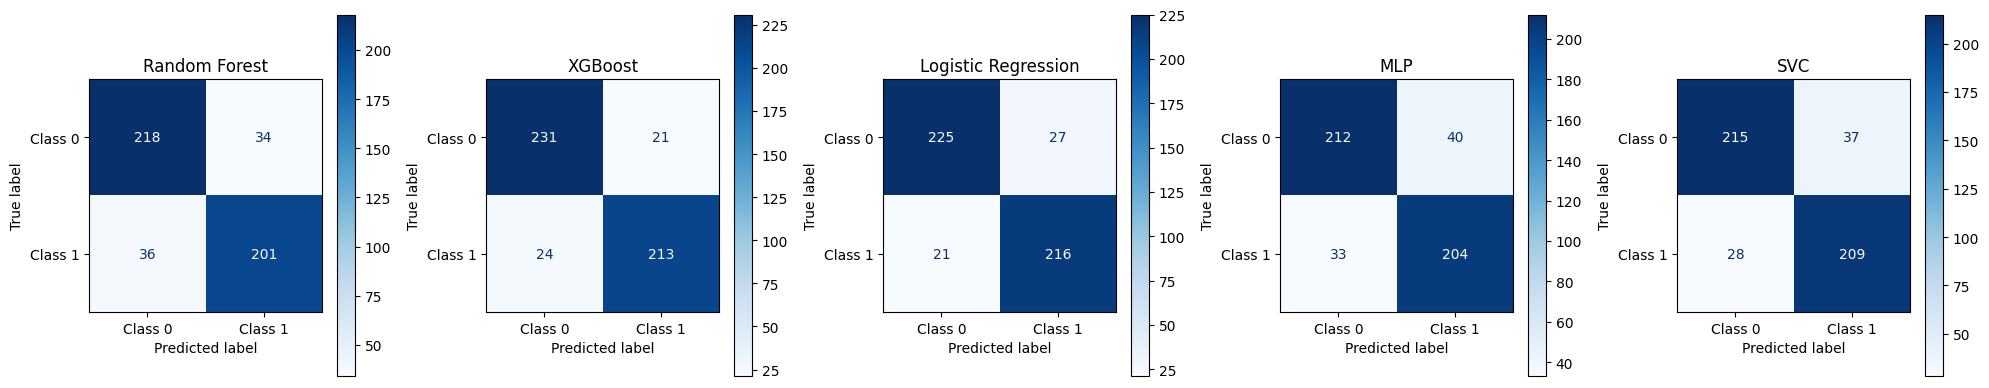

In [9]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns grid

y_pred_rf = predict_random_forest(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest', ax=axes[0])

y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost', ax=axes[1])

y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression', ax=axes[2])

y_pred_mlp = predict_mlp(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP', ax = axes[3])

y_pred_svc = predict_svc(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_svc, 'SVC', ax = axes[4])

plt.tight_layout()
plt.show()